### Lets analize two datasets
- Climat normals Austin TX 1981 - 2010
- Weeather data from Austin, TX 2011
- будем использовать pd.read_csv вместе с методами names (присваивание имен колонам) index_col - присваивание индекса, parse_dates - разделение на даты, na_values - как быть с Na values

In [1]:
file = 'https://assets.datacamp.com/production/course_1639/datasets/NOAA_QCLCD_2011_hourly_13904.txt'
import pandas as pd
df = pd.read_csv(file)
df.head()

,13904,20110101,0053,12,OVC045,,10.00,.1,.2,.3,...,.18,.19,29.95,.20,AA,.21,.22,.23,29.95.1,.24
0,13904,20110101,153,12,OVC049,,10.00,,,,...,,,30.01,,AA,,,,30.02,
1,13904,20110101,253,12,OVC060,,10.00,,,,...,030,,30.01,,AA,,,,30.02,
2,13904,20110101,353,12,OVC065,,10.00,,,,...,,,30.03,,AA,,,,30.04,
3,13904,20110101,453,12,BKN070,,10.00,,,,...,,,30.04,,AA,,,,30.04,
4,13904,20110101,553,12,BKN065,,10.00,,,,...,015,,30.06,,AA,,,,30.06,


#### Нужно грузить без заголовка, Note how the column names are not informative. 

In [2]:
df = pd.read_csv(file, header = None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
0,13904,20110101,53,12,OVC045,,10.00,,,,...,,,29.95,,AA,,,,29.95,
1,13904,20110101,153,12,OVC049,,10.00,,,,...,,,30.01,,AA,,,,30.02,
2,13904,20110101,253,12,OVC060,,10.00,,,,...,030,,30.01,,AA,,,,30.02,
3,13904,20110101,353,12,OVC065,,10.00,,,,...,,,30.03,,AA,,,,30.04,
4,13904,20110101,453,12,BKN070,,10.00,,,,...,,,30.04,,AA,,,,30.04,


#### After the initial step of reading in the data, the next step is to clean and tidy it so that it is easier to work with.

In [3]:
column_labels = 'Wban,date,Time,StationType,sky_condition,sky_conditionFlag,visibility,visibilityFlag,wx_and_obst_to_vision,wx_and_obst_to_visionFlag,dry_bulb_faren,dry_bulb_farenFlag,dry_bulb_cel,dry_bulb_celFlag,wet_bulb_faren,wet_bulb_farenFlag,wet_bulb_cel,wet_bulb_celFlag,dew_point_faren,dew_point_farenFlag,dew_point_cel,dew_point_celFlag,relative_humidity,relative_humidityFlag,wind_speed,wind_speedFlag,wind_direction,wind_directionFlag,value_for_wind_character,value_for_wind_characterFlag,station_pressure,station_pressureFlag,pressure_tendency,pressure_tendencyFlag,presschange,presschangeFlag,sea_level_pressure,sea_level_pressureFlag,record_type,hourly_precip,hourly_precipFlag,altimeter,altimeterFlag,junk'

In [4]:
# Convert the comma separated string column_labels to a list of strings using .split(','). 
# Assign the result to column_labels_list
column_labels_list = column_labels.split(',')

In [5]:
# Reassign df.columns using the list of strings column_labels_list
df.columns = column_labels_list
df.head(2)

,Wban,date,Time,StationType,sky_condition,sky_conditionFlag,visibility,visibilityFlag,wx_and_obst_to_vision,wx_and_obst_to_visionFlag,...,presschange,presschangeFlag,sea_level_pressure,sea_level_pressureFlag,record_type,hourly_precip,hourly_precipFlag,altimeter,altimeterFlag,junk
0,13904,20110101,53,12,OVC045,,10.00,,,,...,,,29.95,,AA,,,,29.95,
1,13904,20110101,153,12,OVC049,,10.00,,,,...,,,30.01,,AA,,,,30.02,


#### Call df.drop() with list_to_drop and axis='columns'. Assign the result to df_dropped

In [6]:
list_to_drop = ['sky_conditionFlag',
 'visibilityFlag',
 'wx_and_obst_to_vision',
 'wx_and_obst_to_visionFlag',
 'dry_bulb_farenFlag',
 'dry_bulb_celFlag',
 'wet_bulb_farenFlag',
 'wet_bulb_celFlag',
 'dew_point_farenFlag',
 'dew_point_celFlag',
 'relative_humidityFlag',
 'wind_speedFlag',
 'wind_directionFlag',
 'value_for_wind_character',
 'value_for_wind_characterFlag',
 'station_pressureFlag',
 'pressure_tendencyFlag',
 'pressure_tendency',
 'presschange',
 'presschangeFlag',
 'sea_level_pressureFlag',
 'hourly_precip',
 'hourly_precipFlag',
 'altimeter',
 'record_type',
 'altimeterFlag',
 'junk']

In [7]:
df_dropped = df.drop(list_to_drop, axis = 'columns')
df_dropped.head(3) 

,Wban,date,Time,StationType,sky_condition,visibility,dry_bulb_faren,dry_bulb_cel,wet_bulb_faren,wet_bulb_cel,dew_point_faren,dew_point_cel,relative_humidity,wind_speed,wind_direction,station_pressure,sea_level_pressure
0,13904,20110101,53,12,OVC045,10.00,51,10.6,38,3.1,15,-9.4,24,15,360,29.42,29.95
1,13904,20110101,153,12,OVC049,10.00,51,10.6,37,3.0,14,-10.0,23,10,340,29.49,30.01
2,13904,20110101,253,12,OVC060,10.00,51,10.6,37,2.9,13,-10.6,22,15,010,29.49,30.01


### Cleaning and tidying datetime data

####  our job is to clean up the date and Time columns and combine them into a datetime collection to be used as the Index.

In [8]:
# Convert the 'date' column to a string with .astype(str) and assign to df_dropped['date']
df_dropped['date'] = df_dropped['date'].astype(str)

In [9]:
# Pad leading zeros to the Time column: df_dropped['Time']
df_dropped['Time'] = df_dropped['Time'].apply(lambda x:'{:0>4}'.format(x))

In [10]:
df_dropped.head()

,Wban,date,Time,StationType,sky_condition,visibility,dry_bulb_faren,dry_bulb_cel,wet_bulb_faren,wet_bulb_cel,dew_point_faren,dew_point_cel,relative_humidity,wind_speed,wind_direction,station_pressure,sea_level_pressure
0,13904,20110101,0053,12,OVC045,10.00,51,10.6,38,3.1,15,-9.4,24,15,360,29.42,29.95
1,13904,20110101,0153,12,OVC049,10.00,51,10.6,37,3.0,14,-10.0,23,10,340,29.49,30.01
2,13904,20110101,0253,12,OVC060,10.00,51,10.6,37,2.9,13,-10.6,22,15,010,29.49,30.01
3,13904,20110101,0353,12,OVC065,10.00,50,10.0,38,3.1,17,-8.3,27,7,350,29.51,30.03
4,13904,20110101,0453,12,BKN070,10.00,50,10.0,37,2.8,15,-9.4,25,11,020,29.51,30.04


In [11]:
# Concatenate the new 'date' and 'Time' columns together. Assign to date_string
date_string = df_dropped['date'] + df_dropped['Time']
date_string.head()

0    201101010053
1    201101010153
2    201101010253
3    201101010353
4    201101010453
dtype: object

In [12]:
# Convert the date_string Series to datetime values with pd.to_datetime(). Specify the format parameter.
date_times = pd.to_datetime(date_string, format='%Y%m%d%H%M')
date_times.head()

0   2011-01-01 00:53:00
1   2011-01-01 01:53:00
2   2011-01-01 02:53:00
3   2011-01-01 03:53:00
4   2011-01-01 04:53:00
dtype: datetime64[ns]

In [13]:
df_clean = df_dropped.set_index(date_times)
print(df_clean.head())

                      Wban      date  Time  StationType sky_condition  \
2011-01-01 00:53:00  13904  20110101  0053           12        OVC045   
2011-01-01 01:53:00  13904  20110101  0153           12        OVC049   
2011-01-01 02:53:00  13904  20110101  0253           12        OVC060   
2011-01-01 03:53:00  13904  20110101  0353           12        OVC065   
2011-01-01 04:53:00  13904  20110101  0453           12        BKN070   

                    visibility dry_bulb_faren dry_bulb_cel wet_bulb_faren  \
2011-01-01 00:53:00      10.00             51         10.6             38   
2011-01-01 01:53:00      10.00             51         10.6             37   
2011-01-01 02:53:00      10.00             51         10.6             37   
2011-01-01 03:53:00      10.00             50         10.0             38   
2011-01-01 04:53:00      10.00             50         10.0             37   

                    wet_bulb_cel dew_point_faren dew_point_cel  \
2011-01-01 00:53:00          3.1

### Cleaning the numeric columns

#### The numeric columns contain missing values labeled as 'M' job is to transform these columns such that they contain only numeric values and interpret missing data as NaN

In [14]:
# Print the 'dry_bulb_faren' temperature between 8 AM and 9 AM on June 20, 2011.
df_clean.loc['8 AM 20 Jun 2011':'2011-06-20 09:00:00', 'dry_bulb_faren']

2011-06-20 08:27:00     M
2011-06-20 08:28:00     M
2011-06-20 08:29:00     M
2011-06-20 08:30:00     M
2011-06-20 08:31:00     M
2011-06-20 08:32:00     M
2011-06-20 08:33:00     M
2011-06-20 08:34:00     M
2011-06-20 08:35:00     M
2011-06-20 08:53:00    83
Name: dry_bulb_faren, dtype: object

In [15]:
# Convert the 'dry_bulb_faren' column to numeric values with pd.to_numeric(). Specify errors='coerce'.
df_clean['dry_bulb_faren'] = pd.to_numeric(df_clean['dry_bulb_faren'], errors ='coerce')
df_clean.loc['2011-06-20 08:00:00':'2011-06-20 09:00:00', 'dry_bulb_faren']


2011-06-20 08:27:00     NaN
2011-06-20 08:28:00     NaN
2011-06-20 08:29:00     NaN
2011-06-20 08:30:00     NaN
2011-06-20 08:31:00     NaN
2011-06-20 08:32:00     NaN
2011-06-20 08:33:00     NaN
2011-06-20 08:34:00     NaN
2011-06-20 08:35:00     NaN
2011-06-20 08:53:00    83.0
Name: dry_bulb_faren, dtype: float64

In [16]:
# Convert the 'wind_speed' and 'dew_point_faren' columns to numeric values with pd.to_numeric(). 
# Again, specify errors='coerce'
df_clean['wind_speed'] = pd.to_numeric(df_clean['wind_speed'], errors = 'coerce')
df_clean['dew_point_faren'] = pd.to_numeric(df_clean['dew_point_faren'], errors = 'coerce')

#### Now that your data are clean, we can begin with your exploratory analysis

### Имеем методы срезов и выборов date index

### Имеем методы статистики
- describe(): summary
- mean(): average
- count(): counting entries
- median(): median
- std(): stand deviation

#### например мы полагаем, что средняя температура в январе меньше чем средняя в июле

#### Our jobin this exercise is to analyze the 'dry_bulb_faren' column and print the median temperatures for specific time ranges. You can do this using partial datetime string selection. We assume that average temperature in january is lower than average temperature in july.

In [17]:
# Select the 'dry_bulb_faren' column and print the output of .median()
df_clean.dry_bulb_faren.median()

72.0

In [18]:
# Use .loc[] to select the range '2011-Apr':'2011-Jun' from dry_bulb_faren' and print the output of .median()
df_clean.loc['2011-Apr':'2011-Jun', 'dry_bulb_faren'].median()

78.0

In [19]:
# Use .loc[] to select the month '2011-Jan' from 'dry_bulb_faren' and print the output of .median()
df_clean.loc['2011-Jan', 'dry_bulb_faren'].median()

48.0

#### now ready to compare the 2011 weather data with the 30-year normals reported in 2010. You can ask questions such as, on average, how much hotter was every day in 2011 than expected from the 30-year average?

####  job is to first resample df_clean and df_climate by day and aggregate the mean temperatures. You will then extract the temperature related columns from each - 'dry_bulb_faren' in df_clean, and 'Temperature' in df_climate - as NumPy arrays and compute the difference.

In [20]:
file = 'weather_data_austin_2010.csv'
df_climate = pd.read_csv(file, parse_dates = True, index_col = 'Date')
df_climate.head()

,Temperature,DewPoint,Pressure
Date,,,
2010-01-01 00:00:00,46.2,37.5,1.0
2010-01-01 01:00:00,44.6,37.1,1.0
2010-01-01 02:00:00,44.1,36.9,1.0
2010-01-01 03:00:00,43.8,36.9,1.0
2010-01-01 04:00:00,43.5,36.8,1.0


In [21]:
df_clean.head()

,Wban,date,Time,StationType,sky_condition,visibility,dry_bulb_faren,dry_bulb_cel,wet_bulb_faren,wet_bulb_cel,dew_point_faren,dew_point_cel,relative_humidity,wind_speed,wind_direction,station_pressure,sea_level_pressure
2011-01-01 00:53:00,13904,20110101,0053,12,OVC045,10.00,51.0,10.6,38,3.1,15.0,-9.4,24,15.0,360,29.42,29.95
2011-01-01 01:53:00,13904,20110101,0153,12,OVC049,10.00,51.0,10.6,37,3.0,14.0,-10.0,23,10.0,340,29.49,30.01
2011-01-01 02:53:00,13904,20110101,0253,12,OVC060,10.00,51.0,10.6,37,2.9,13.0,-10.6,22,15.0,010,29.49,30.01
2011-01-01 03:53:00,13904,20110101,0353,12,OVC065,10.00,50.0,10.0,38,3.1,17.0,-8.3,27,7.0,350,29.51,30.03
2011-01-01 04:53:00,13904,20110101,0453,12,BKN070,10.00,50.0,10.0,37,2.8,15.0,-9.4,25,11.0,020,29.51,30.04


#### Our job is to first resample df_clean and df_climate by day and aggregate the mean temperatures. You will then extract the temperature related columns from each - 'dry_bulb_faren' in df_clean, and 'Temperature' in df_climate - as NumPy arrays and compute the difference.

In [22]:
# Downsample df_clean with daily frequency and aggregate by the mean. Store the result as daily_mean_2011
daily_mean_2011 = df_clean.resample('D').mean()
daily_mean_2011.head()

,Wban,StationType,dry_bulb_faren,dew_point_faren,wind_speed
2011-01-01,13904,12,50.166667,20.500000,11.083333
2011-01-02,13904,12,39.416667,19.708333,4.166667
2011-01-03,13904,12,46.846154,35.500000,2.653846
2011-01-04,13904,12,53.367347,50.408163,2.510204
2011-01-05,13904,12,57.965517,40.068966,4.689655


In [23]:
# Extract the 'dry_bulb_faren' column from daily_mean_2011 as a NumPy array using .values. Store the result as daily_temp_2011. 
# Note: .values is an attribute, not a method, so you don't have to use ()
daily_temp_2011 = daily_mean_2011['dry_bulb_faren'].values
daily_temp_2011[:10]

array([ 50.16666667,  39.41666667,  46.84615385,  53.36734694,
        57.96551724,  46.95833333,  51.91666667,  51.81481481,
        43.61363636,  38.27777778])

In [24]:
# Downsample df_climate with daily frequency and aggregate by the mean. Store the result as daily_climate
daily_climate = df_climate.resample('D').mean()
daily_climate.head()

,Temperature,DewPoint,Pressure
Date,,,
2010-01-01,49.337500,37.716667,1.0
2010-01-02,49.795833,38.370833,1.0
2010-01-03,49.900000,38.279167,1.0
2010-01-04,49.729167,38.008333,1.0
2010-01-05,49.841667,38.087500,1.0


In [25]:
# Extract the 'Temperature' column from daily_climate using the .reset_index() method. 
# To do this, first reset the index of daily_climate, and then use bracket slicing to access 'Temperature'. 
# Store the result as daily_temp_climate
daily_temp_climate = daily_climate.reset_index()['Temperature']
daily_temp_climate.head()

0    49.337500
1    49.795833
2    49.900000
3    49.729167
4    49.841667
Name: Temperature, dtype: float64

In [26]:
# Compute the difference between the two arrays and print the mean difference
difference = daily_temp_2011 - daily_temp_climate
print(difference.mean())

1.3301831870056482


### Sunny or cloudy

####  how much hotter is it when the sun is shining? Our job is to use Boolean selection to filter out sunny and overcast days, and then compute the difference of the mean daily maximum temperatures between each type of day.

In [27]:
# Use .loc[] to select sunny days and assign to sunny. If 'sky_condition' equals 'CLR', then the day is sunny.
sunny = df_clean.loc[df_clean['sky_condition'] =='CLR']
sunny.head()

,Wban,date,Time,StationType,sky_condition,visibility,dry_bulb_faren,dry_bulb_cel,wet_bulb_faren,wet_bulb_cel,dew_point_faren,dew_point_cel,relative_humidity,wind_speed,wind_direction,station_pressure,sea_level_pressure
2011-01-01 13:53:00,13904,20110101,1353,12,CLR,10.00,59.0,15.0,45,7.0,26.0,-3.3,28,14.0,010,29.63,30.16
2011-01-01 14:53:00,13904,20110101,1453,12,CLR,10.00,59.0,15.0,45,7.2,27.0,-2.8,29,16.0,360,29.63,30.16
2011-01-01 15:53:00,13904,20110101,1553,12,CLR,10.00,57.0,13.9,44,6.6,27.0,-2.8,32,11.0,350,29.63,30.17
2011-01-01 16:53:00,13904,20110101,1653,12,CLR,10.00,55.0,12.8,43,6.1,27.0,-2.8,34,13.0,040,29.65,30.18
2011-01-01 17:53:00,13904,20110101,1753,12,CLR,10.00,50.0,10.0,40,4.5,26.0,-3.3,39,10.0,040,29.66,30.21


In [28]:
# Use .loc[] to select overcast days and assign to overcast. If 'sky_condition' contains 'OVC', then the day is overcast.
overcast = df_clean.loc[df_clean['sky_condition'].str.contains('OVC')]
overcast.tail()

,Wban,date,Time,StationType,sky_condition,visibility,dry_bulb_faren,dry_bulb_cel,wet_bulb_faren,wet_bulb_cel,dew_point_faren,dew_point_cel,relative_humidity,wind_speed,wind_direction,station_pressure,sea_level_pressure
2011-12-26 07:53:00,13904,20111226,0753,12,SCT025 OVC030,8.00,44.0,6.7,43,5.8,41.0,5.0,89,0.0,000,29.71,30.26
2011-12-26 08:00:00,13904,20111226,0800,12,FEW021 OVC029,10.00,45.0,7.0,43,6.1,41.0,5.0,86,0.0,000,29.70,M
2011-12-26 08:36:00,13904,20111226,0836,12,OVC030,10.00,45.0,7.0,44,6.6,43.0,6.0,93,0.0,000,29.71,M
2011-12-26 08:53:00,13904,20111226,0853,12,SCT019 BKN032 OVC090,10.00,45.0,7.2,43,6.1,41.0,5.0,86,0.0,000,29.70,30.25
2011-12-28 11:53:00,13904,20111228,1153,12,OVC200,10.00,54.0,12.2,46,8.0,38.0,3.3,55,9.0,170,29.56,30.10


In [29]:
# Resample sunny and overcast and aggregate by the maximum (.max()) daily ('D') temperature. Assign to sunny_daily_max and overcast_daily_max.
sunny_daily_max = sunny.resample('D').max()
overcast_daily_max = overcast.resample('D').max()
sunny_daily_max.head()

,Wban,date,Time,StationType,sky_condition,visibility,dry_bulb_faren,dry_bulb_cel,wet_bulb_faren,wet_bulb_cel,dew_point_faren,dew_point_cel,relative_humidity,wind_speed,wind_direction,station_pressure,sea_level_pressure
2011-01-01,13904.0,20110101,2353,12.0,CLR,10.00,59.0,8.3,45,7.2,28.0,-6.1,53,16.0,360,29.78,30.33
2011-01-02,13904.0,20110102,2253,12.0,CLR,10.00,35.0,1.7,32,0.1,28.0,-7.2,76,8.0,360,29.82,30.38
2011-01-03,13904.0,20110103,0453,12.0,CLR,10.00,32.0,0.0,29,-1.9,26.0,-4.4,85,0.0,000,29.71,30.27
2011-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-05,13904.0,20110105,2353,12.0,CLR,10.00,35.0,1.7,33,0.3,29.0,-1.7,79,0.0,000,29.54,30.08


In [30]:
overcast_daily_max.head()

,Wban,date,Time,StationType,sky_condition,visibility,dry_bulb_faren,dry_bulb_cel,wet_bulb_faren,wet_bulb_cel,dew_point_faren,dew_point_cel,relative_humidity,wind_speed,wind_direction,station_pressure,sea_level_pressure
2011-01-01,13904.0,20110101,0353,12.0,OVC065,10.00,51.0,10.6,38,3.1,17.0,-9.4,27,15.0,360,29.51,30.03
2011-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-03,13904.0,20110103,2353,12.0,SCT042 OVC055,10.00,58.0,9.4,49,9.7,45.0,7.0,79,10.0,200,29.70,M
2011-01-04,13904.0,20110104,2353,12.0,SCT010 OVC016,10.00,57.0,8.9,56,9.4,56.0,8.9,100,8.0,VR,29.59,M
2011-01-05,13904.0,20110105,0653,12.0,SCT006 OVC011,10.00,57.0,14.0,56,13.5,56.0,13.3,96,3.0,250,29.48,M


In [31]:
# Print the difference between the mean of sunny_daily_max and overcast_daily_max
print(sunny_daily_max.mean() - overcast_daily_max.mean())

Wban               0.000000
StationType        0.000000
dry_bulb_faren     6.504304
dew_point_faren   -4.339286
wind_speed        -3.246062
dtype: float64


### Visual exploratory data analysis

#### Weekly average temperature and visibility

In [32]:
sunny_daily_max.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2011-01-01 to 2011-12-31
Freq: D
Data columns (total 17 columns):
Wban                  280 non-null float64
date                  280 non-null object
Time                  280 non-null object
StationType           280 non-null float64
sky_condition         280 non-null object
visibility            280 non-null object
dry_bulb_faren        280 non-null float64
dry_bulb_cel          280 non-null object
wet_bulb_faren        280 non-null object
wet_bulb_cel          280 non-null object
dew_point_faren       280 non-null float64
dew_point_cel         280 non-null object
relative_humidity     280 non-null object
wind_speed            280 non-null float64
wind_direction        280 non-null object
station_pressure      280 non-null object
sea_level_pressure    280 non-null object
dtypes: float64(5), object(12)
memory usage: 51.3+ KB


#### Is there a correlation between temperature and visibility? Let's find out.

In this exercise, we plot the weekly average temperature and visibility as subplots. To do this, we need to first select the appropriate columns and then resample by week, aggregating the mean. 

#### In addition to creating the subplots, we will compute the Pearson correlation coefficient using .corr(). The Pearson correlation coefficient, known also as Pearson's r, ranges from -1 (indicating total negative linear correlation) to 1 (indicating total positive linear correlation). A value close to 1 here would indicate that there is a strong correlation between temperature and visibility.

In [33]:
# make visibility column numeric
df_clean['visibility'] = pd.to_numeric(df_clean['visibility'], errors = 'coerce')

In [34]:
import matplotlib.pyplot as plt
# Select the 'visibility' and 'dry_bulb_faren' columns and resample them by week, aggregating the mean. 
# Assign the result to weekly_mean
weekly_mean = df_clean.loc[:,['visibility', 'dry_bulb_faren']].resample('W').mean()
# Print the output of weekly_mean.corr()
weekly_mean.corr()

,visibility,dry_bulb_faren
visibility,1.000000,0.490328
dry_bulb_faren,0.490328,1.000000


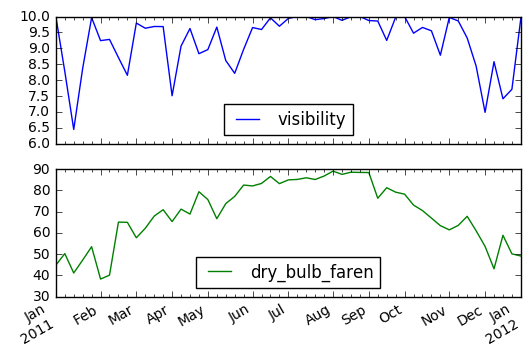

In [35]:
weekly_mean.plot(subplots = True)
plt.show()

### Daily hours of clear sky

#### Our job is to resample 'sky_condition appropriately such that we can extract the number of sunny hours in a day and the number of total hours. Then, we can divide the number of sunny hours by the number of total hours, and generate a box plot of the resulting fraction.

In [36]:
# Create a Boolean Series for sunny days. Assign the result to sunny
sunny = df_clean['sky_condition'] =='CLR'
sunny.loc['2011-01-01 10:00:00':'2011-01-01 16:00:00'].resample('H').head()

C:\Users\Pavel\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: .resample() is now a deferred operation
use .resample(...).mean() instead of .resample(...)
  app.launch_new_instance()


2011-01-01 10:00:00    False
2011-01-01 11:00:00    False
2011-01-01 12:00:00    False
2011-01-01 13:00:00     True
2011-01-01 14:00:00     True
Freq: H, Name: sky_condition, dtype: bool

In [37]:
# Resample sunny by day and compute the sum. Assign the result to sunny_hours
sunny_hours = sunny.resample('D').sum()
sunny_hours.head()

2011-01-01    11.0
2011-01-02     7.0
2011-01-03     3.0
2011-01-04     0.0
2011-01-05     1.0
Freq: D, Name: sky_condition, dtype: float64

In [38]:
# Resample sunny by day and compute the count. Assign the result to total_hours
total_hours = sunny.resample('D').count()
total_hours.head()

2011-01-01    24
2011-01-02    24
2011-01-03    26
2011-01-04    49
2011-01-05    29
Freq: D, Name: sky_condition, dtype: int64

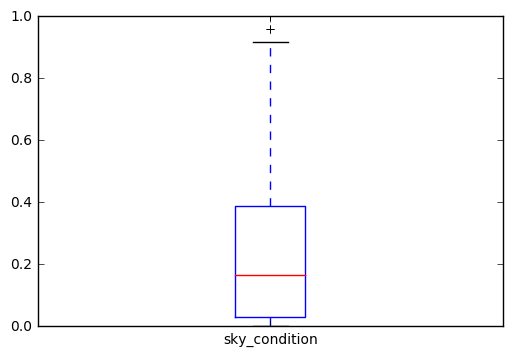

In [39]:
# Divide sunny_hours by total_hours. Assign to sunny_fraction
sunny_fraction = sunny_hours / total_hours
# Make a box plot of sunny_fraction
sunny_fraction.plot(kind='box')
plt.show()

### Heat or humidity

#### Dew point is a measure of relative humidity based on pressure and temperature. A dew point above 65 is considered uncomfortable while a temperature above 90 is also considered uncomfortable.

In this step, we will explore the maximum temperature and dew point of each month. The columns of interest are 'dew_point_faren' and 'dry_bulb_faren'. After resampling them appropriately to get the maximum temperature and dew point in each month, generate a histogram of these values as subplots. Uncomfortably, you will notice that the maximum dew point is above 65 every month! 

In [40]:
# Select the 'dew_point_faren' and 'dry_bulb_faren' columns (in that order). Resample by month and aggregate the maximum monthly temperatures. 
# Assign the result to monthly_max
monthly_max = df_clean.loc[:,['dew_point_faren','dry_bulb_faren']].resample('M').max()
monthly_max.head()

,dew_point_faren,dry_bulb_faren
2011-01-31,63.0,80.0
2011-02-28,70.0,85.0
2011-03-31,68.0,87.0
2011-04-30,73.0,93.0
2011-05-31,76.0,100.0


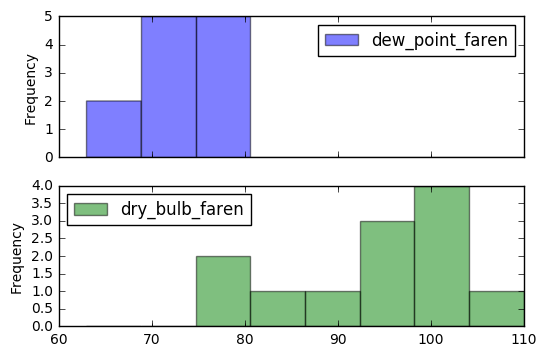

In [41]:
# lot a histogram of the resampled data with bins=8, alpha=0.5, and subplots=True
monthly_max.plot(kind='hist', bins = 8, alpha = 0.5, subplots = True)
plt.show()

### Probability of high temperatures

#### We already know that 2011 was hotter than the climate normals for the previous thirty years. In this final step, we will compare the maximum temperature in August 2011 against that of the August 2010 climate normals. More specifically, you will use a CDF plot to determine the probability of the 2011 daily maximum temperature in August being above the 2010 climate normal value. To do this, we will leverage the data manipulation, filtering, resampling, and visualization 

In [44]:
df_climate.head(3)

,Temperature,DewPoint,Pressure
Date,,,
2010-01-01 00:00:00,46.2,37.5,1.0
2010-01-01 01:00:00,44.6,37.1,1.0
2010-01-01 02:00:00,44.1,36.9,1.0


In [45]:
df_clean.head(2)

,Wban,date,Time,StationType,sky_condition,visibility,dry_bulb_faren,dry_bulb_cel,wet_bulb_faren,wet_bulb_cel,dew_point_faren,dew_point_cel,relative_humidity,wind_speed,wind_direction,station_pressure,sea_level_pressure
2011-01-01 00:53:00,13904,20110101,0053,12,OVC045,10.0,51.0,10.6,38,3.1,15.0,-9.4,24,15.0,360,29.42,29.95
2011-01-01 01:53:00,13904,20110101,0153,12,OVC049,10.0,51.0,10.6,37,3.0,14.0,-10.0,23,10.0,340,29.49,30.01


In [48]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10337 entries, 2011-01-01 00:53:00 to 2011-12-31 23:53:00
Data columns (total 17 columns):
Wban                  10337 non-null int64
date                  10337 non-null object
Time                  10337 non-null object
StationType           10337 non-null int64
sky_condition         10337 non-null object
visibility            10324 non-null float64
dry_bulb_faren        10326 non-null float64
dry_bulb_cel          10337 non-null object
wet_bulb_faren        10337 non-null object
wet_bulb_cel          10337 non-null object
dew_point_faren       10323 non-null float64
dew_point_cel         10337 non-null object
relative_humidity     10337 non-null object
wind_speed            10318 non-null float64
wind_direction        10337 non-null object
station_pressure      10337 non-null object
sea_level_pressure    10337 non-null object
dtypes: float64(4), int64(2), object(11)
memory usage: 1.4+ MB


In [42]:
# From df_climate, extract the maximum temperature observed in August 2010. 
#The relevant column here is 'Temperature'. You can select the rows corresponding to August 2010 in multiple ways. 
#For example, df_climate.loc['2011-Feb'] selects all rows corresponding to February 2011, 
#while df_climate.loc['2009-09', 'Pressure'] selects the rows corresponding to September 2009 from the 'Pressure' column.

In [43]:
august_max = df_climate.loc['2010-Aug', 'Temperature'].max()
august_max

95.299999999999997

In [51]:
# From df_clean, select the August 2011 temperature data from the 'dry_bulb_faren'. 
# Resample this data by day and aggregate the maximum value. 
# Store the result in august_2011
august_2011 = df_clean.loc['2011-Aug','dry_bulb_faren'].resample('D').max()


2011-08-01     True
2011-08-02     True
2011-08-03     True
2011-08-04     True
2011-08-05     True
2011-08-06     True
2011-08-07     True
2011-08-08     True
2011-08-09     True
2011-08-10     True
2011-08-11     True
2011-08-12     True
2011-08-13     True
2011-08-14     True
2011-08-15     True
2011-08-16     True
2011-08-17     True
2011-08-18     True
2011-08-19     True
2011-08-20     True
2011-08-21     True
2011-08-22     True
2011-08-23     True
2011-08-24     True
2011-08-25    False
2011-08-26     True
2011-08-27     True
2011-08-28     True
2011-08-29     True
2011-08-30     True
2011-08-31     True
Freq: D, Name: dry_bulb_faren, dtype: bool

In [52]:
# Filter out days in august_2011 where the value exceeded august_max. 
# Store the result in august_2011_high
august_2011_high = august_2011.loc[august_2011>august_max]
august_2011_high

2011-08-01    103.0
2011-08-02    103.0
2011-08-03    103.0
2011-08-04    104.0
2011-08-05    103.0
2011-08-06    102.0
2011-08-07    102.0
2011-08-08    103.0
2011-08-09    103.0
2011-08-10    102.0
2011-08-11    101.0
2011-08-12    100.0
2011-08-13     96.0
2011-08-14    101.0
2011-08-15    103.0
2011-08-16    102.0
2011-08-17    100.0
2011-08-18    104.0
2011-08-19    103.0
2011-08-20    104.0
2011-08-21    102.0
2011-08-22    103.0
2011-08-23    102.0
2011-08-24    102.0
2011-08-26    101.0
2011-08-27    107.0
2011-08-28    110.0
2011-08-29    107.0
2011-08-30    103.0
2011-08-31    100.0
Name: dry_bulb_faren, dtype: float64

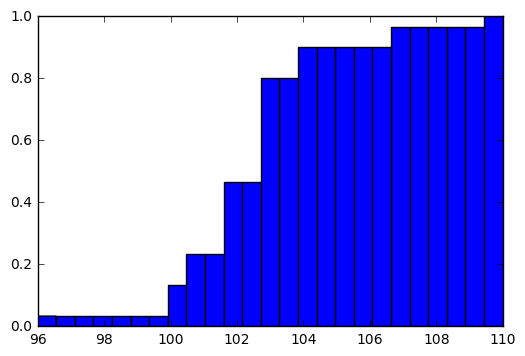

In [53]:
# Construct a CDF of august_2011_high using 25 bins. Remember to specify the kind, 
# normed, and cumulative parameters in addition to bins
plt.hist(august_2011_high, bins = 25, normed = 1, cumulative = True)
plt.show()

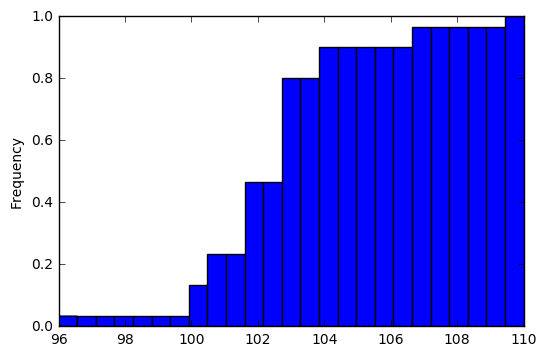

In [55]:
august_2011_high.plot(kind='hist', normed=True, cumulative=True, bins=25)
plt.show()

### there was a 50% probability of the 2011 daily maximum temperature in August being 5 degrees above the 2010 climate normal value!